In [1]:
from datascience import *
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Classifying Patients ##

In [2]:
ckd = Table.read_table('data/ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.show(3)

In [3]:
ckd.group('Class')

Class | count
0     | 115
1     | 43

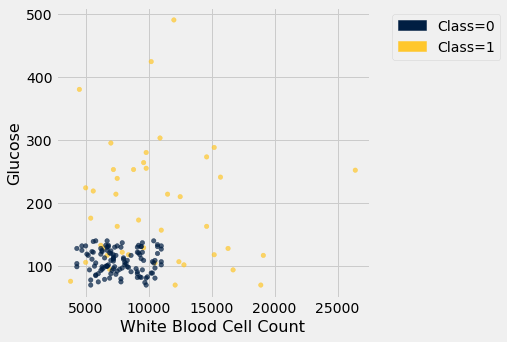

In [4]:
ckd.scatter('White Blood Cell Count', 'Glucose', group='Class')

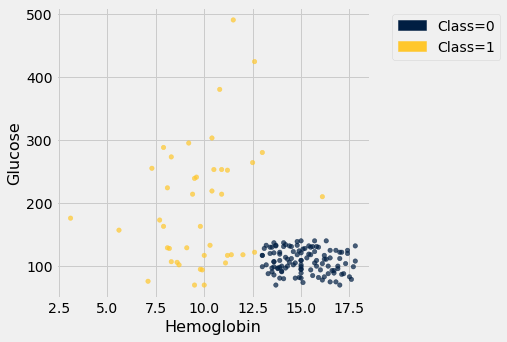

In [5]:
ckd.scatter('Hemoglobin', 'Glucose', group='Class')

In [6]:
# we want to be able to way to predict the class of someone
# without having to plot & eye ball this graph every time.
#
# one way to do this is to put some thresholds into code

max_glucose_for_0 = ckd.where('Class',are.equal_to(0)).column('Glucose').max()
min_hemoglobin_for_0 = ckd.where('Class',are.equal_to(0)).column('Hemoglobin').min()

In [7]:
def classify(hemoglobin, glucose):
    if hemoglobin < min_hemoglobin_for_0 or glucose > max_glucose_for_0:
        return 1
    else:
        return 0

In [8]:
# Let's try our classifier!
classify(15, 100)

0

In [9]:
classify(10, 300)

1

## Classifying Banknotes ##

In [10]:
banknotes = Table.read_table('data/banknote.csv')
banknotes

WaveletVar | WaveletSkew | WaveletCurt | Entropy  | Class
3.6216     | 8.6661      | -2.8073     | -0.44699 | 0
4.5459     | 8.1674      | -2.4586     | -1.4621  | 0
3.866      | -2.6383     | 1.9242      | 0.10645  | 0
3.4566     | 9.5228      | -4.0112     | -3.5944  | 0
0.32924    | -4.4552     | 4.5718      | -0.9888  | 0
4.3684     | 9.6718      | -3.9606     | -3.1625  | 0
3.5912     | 3.0129      | 0.72888     | 0.56421  | 0
2.0922     | -6.81       | 8.4636      | -0.60216 | 0
3.2032     | 5.7588      | -0.75345    | -0.61251 | 0
1.5356     | 9.1772      | -2.2718     | -0.73535 | 0
... (1362 rows omitted)

In [11]:
banknotes.group('Class')

Class | count
0     | 762
1     | 610

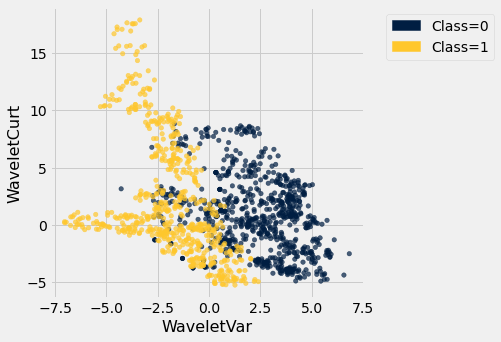

In [12]:
banknotes.scatter('WaveletVar', 'WaveletCurt', group='Class')

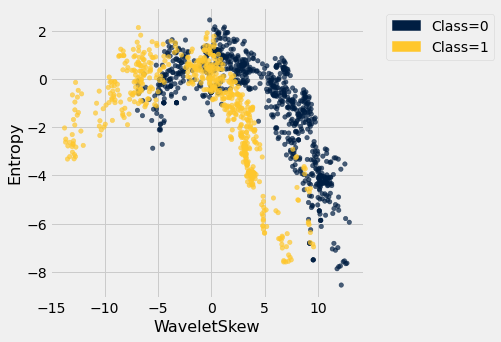

In [13]:
banknotes.scatter('WaveletSkew', 'Entropy', group='Class')

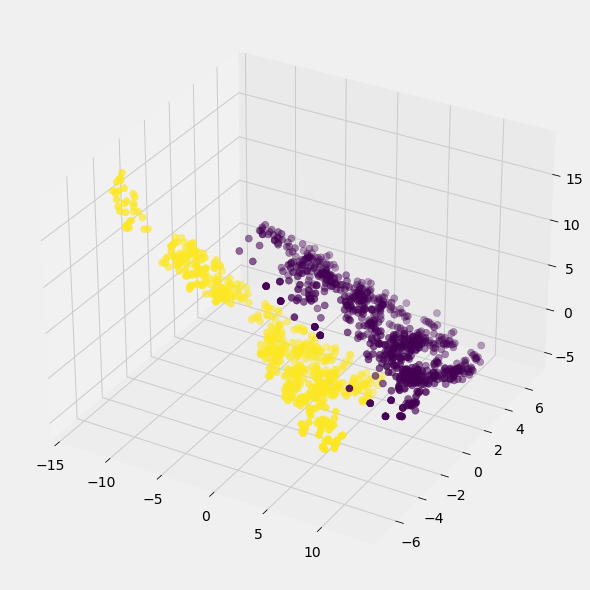

In [14]:
fig = plots.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(banknotes.column('WaveletSkew'), 
           banknotes.column('WaveletVar'), 
           banknotes.column('WaveletCurt'), 
           c=banknotes.column('Class'),
           cmap='viridis',
          s=50);

## Distance

In [15]:
def distance(pt_A, pt_B):
    return np.sum((pt_B - pt_A) ** 2) ** 0.5

In [16]:
pt_A = np.array(banknotes.drop('Class').row(1))
pt_B = np.array(banknotes.drop('Class').row(4))

In [17]:
distance(pt_A, pt_B)

15.058578597118654